In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = 'data.csv'
df = pd.read_csv(csv_path)

/tmp/ipykernel_295047/726448042.py:2: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [4]:
columns = df.columns.tolist()

In [5]:
columns

['version',
 'doi',
 'A_WAVE',
 'A_YEAR',
 'A_STUDY',
 'B_COUNTRY',
 'B_COUNTRY_ALPHA',
 'C_COW_NUM',
 'C_COW_ALPHA',
 'D_INTERVIEW',
 'S007',
 'J_INTDATE',
 'FW_START',
 'FW_END',
 'K_TIME_START',
 'K_TIME_END',
 'K_DURATION',
 'Q_MODE',
 'N_REGION_ISO',
 'N_REGION_WVS',
 'N_REGION_NUTS2',
 'N_REG_NUTS1',
 'N_TOWN',
 'G_TOWNSIZE',
 'G_TOWNSIZE2',
 'H_SETTLEMENT',
 'H_URBRURAL',
 'I_PSU',
 'O1_LONGITUDE',
 'O2_LATITUDE',
 'L_INTERVIEWER_NUMBER',
 'S_INTLANGUAGE',
 'LNGE_ISO',
 'E_RESPINT',
 'F_INTPRIVACY',
 'E1_LITERACY',
 'W_WEIGHT',
 'S018',
 'PWGHT',
 'S025',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q33_3',
 'Q34',
 'Q34_3',
 'Q35',
 'Q35_3',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q46',
 'Q47',
 'Q48',
 'Q49',
 'Q50',
 'Q51',
 '

In [7]:
len(columns)

613

In [6]:
question_columns = [col for col in df.columns if col.startswith('Q')]

# Group 2: Metadata (all other columns)
metadata_columns = [col for col in df.columns if not col.startswith('Q')]

print("Number of question columns:", len(question_columns))
print("Number of metadata columns:", len(metadata_columns))

Number of question columns: 373
Number of metadata columns: 240


In [8]:
df_questions = pd.DataFrame(question_columns, columns=['question_columns'])
df_metadata = pd.DataFrame(metadata_columns, columns=['metadata_columns'])

# Save each DataFrame to a CSV file
df_questions.to_csv('question_columns.csv', index=False)
df_metadata.to_csv('metadata_columns.csv', index=False)


In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data.csv')

# Prepare a list to store column names and their unique values
unique_vals = []

# Loop over each column
for col in df.columns:
    # Drop NaNs and convert unique values to a list
    uniques = df[col].dropna().unique()
    # Convert all items to string and join them with commas
    unique_str = ", ".join(map(str, uniques))
    unique_vals.append([col, unique_str])

# Create a DataFrame from the list
df_unique = pd.DataFrame(unique_vals, columns=['Column', 'Unique Values'])

# Save the DataFrame to a CSV file
df_unique.to_csv('unique_values.csv', index=False)

print("Unique values for each column have been saved to 'unique_values.csv'.")


/tmp/ipykernel_295047/477641556.py:4: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Unique values for each column have been saved to 'unique_values.csv'.


In [10]:
import pandas as pd

# Load the existing unique values CSV file
df_unique = pd.read_csv('unique_values.csv')

# Filter out the row where Column equals 'D_INTERVIEW'
df_unique = df_unique[df_unique['Column'] != 'D_INTERVIEW']

# Save the updated DataFrame to a new CSV file
df_unique.to_csv('unique_values_updated.csv', index=False)

print("Dropped 'D_INTERVIEW' from unique_values.csv and saved to 'unique_values_updated.csv'.")


Dropped 'D_INTERVIEW' from unique_values.csv and saved to 'unique_values_updated.csv'.


In [13]:
import pandas as pd

# Load the existing unique values CSV file
df_unique = pd.read_csv('unique_values.csv')

# Define columns to drop
columns_to_drop = ['D_INTERVIEW', 'SACSECVAL', 'S007', 'W_WEIGHT','RESEMAVAL','N_TOWN','O1_LONGITUDE','L_INTERVIEWER_NUMBER']

# Filter out the rows where 'Column' is one of the columns to drop
df_unique = df_unique[~df_unique['Column'].isin(columns_to_drop)]

# Save the updated DataFrame to a new CSV file
df_unique.to_csv('unique_values_updated_#2.csv', index=False)

print("Dropped 'D_INTERVIEW', 'SACSECVAL', and 'S007' from unique_values.csv and saved to 'unique_values_updated.csv'.")


Dropped 'D_INTERVIEW', 'SACSECVAL', and 'S007' from unique_values.csv and saved to 'unique_values_updated.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your CSV file
df = pd.read_csv('filtered.csv')

# Create an output folder for the histograms if it doesn't exist
output_dir = 'histograms_filtered'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop over each column in the DataFrame
for col in df.columns:
    plt.figure(figsize=(8, 6))
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot histogram for numeric column
        sns.histplot(df[col].dropna(), bins=20, kde=False)
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'hist_{col}.png'))
        plt.close()
    else:
        # For non-numeric columns, use a count plot if the unique value count is small enough
        unique_count = df[col].nunique(dropna=True)
        if unique_count <= 20:
            sns.countplot(y=df[col])
            plt.title(f'Count Plot for {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'count_{col}.png'))
            plt.close()
        else:
            # Skip non-numeric columns with too many unique values
            plt.close()
            continue

print("Plots for every column have been saved in the 'histograms' folder.")


/tmp/ipykernel_295047/2159540520.py:7: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Plots for every column have been saved in the 'histograms' folder.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your CSV file
df = pd.read_csv('filtered.csv')

# Create an output folder for composite plots if it doesn't exist
composite_dir = 'filtered_composite_histograms'
if not os.path.exists(composite_dir):
    os.makedirs(composite_dir)

# Get a list of columns that are numeric (for histograms)
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

batch_size = 6
# Loop over numeric columns in batches of 6
for i in range(0, len(numeric_columns), batch_size):
    cols_batch = numeric_columns[i:i+batch_size]
    
    # Create a figure with 2 rows and 3 columns
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    
    for ax, col in zip(axes, cols_batch):
        # Convert column to numeric if needed and drop missing values
        values = pd.to_numeric(df[col], errors='coerce').dropna()
        sns.histplot(values, bins=20, kde=False, ax=ax)
        ax.set_title(f'Histogram for {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    # Remove any empty subplots if the batch has less than 6 columns
    for j in range(len(cols_batch), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    composite_filename = os.path.join(composite_dir, f'composite_{i//batch_size + 1}.png')
    plt.savefig(composite_filename)
    plt.close(fig)

print("Composite plots (6 histograms per image) have been saved in the 'composite_histograms' folder.")


Composite plots (6 histograms per image) have been saved in the 'composite_histograms' folder.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Load your CSV file
df = pd.read_csv('data.csv')

# Create an output folder for the histograms if it doesn't exist
output_dir = 'histograms_#2'
os.makedirs(output_dir, exist_ok=True)

# Function to sanitize file names
def sanitize_filename(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name)

# Loop over each column in the DataFrame
for col in df.columns:
    plt.figure(figsize=(8, 6))

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col].dropna(), bins=20, kde=True)  # Enabled KDE for better visualization
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'hist_{sanitize_filename(col)}.png'))
        plt.close()
    else:
        unique_count = df[col].nunique(dropna=True)
        if unique_count <= 20:  # Small categorical values
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.title(f'Count Plot for {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'count_{sanitize_filename(col)}.png'))
            plt.close()
        elif unique_count < 100:  # If too large, show only the top 20
            top_20 = df[col].value_counts().nlargest(20)
            sns.barplot(y=top_20.index, x=top_20.values)
            plt.title(f'Top 20 Count Plot for {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'count_top20_{sanitize_filename(col)}.png'))
            plt.close()

print("Plots for every column have been saved in the 'histograms' folder.")


/tmp/ipykernel_295047/3592512750.py:8: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


Plots for every column have been saved in the 'histograms' folder.


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [20]:
import os
from PIL import Image

input_folder = 'histograms_#2'
output_folder = 'composite_histograms_#2'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]
image_files.sort()

images_per_composite = 6
rows = 2
cols = 3
thumb_width = 600
thumb_height = 400

for i in range(0, len(image_files), images_per_composite):
    batch = image_files[i:i+images_per_composite]
    
    images = []
    for img_name in batch:
        img_path = os.path.join(input_folder, img_name)
        with Image.open(img_path) as im:
            im = im.copy()  # so we can safely resize
            im.thumbnail((thumb_width, thumb_height), Image.Resampling.LANCZOS)
            images.append(im)
    
    composite_width = cols * thumb_width
    composite_height = rows * thumb_height
    composite = Image.new('RGB', (composite_width, composite_height), color=(255, 255, 255))
    
    for index, img in enumerate(images):
        row_i = index // cols
        col_i = index % cols
        x_offset = col_i * thumb_width
        y_offset = row_i * thumb_height
        composite.paste(img, (x_offset, y_offset))
    
    composite_filename = f'composite_{(i // images_per_composite) + 1}.png'
    composite_path = os.path.join(output_folder, composite_filename)
    composite.save(composite_path, 'PNG')

print("Composite images have been saved in the 'composite_histograms' folder.")


Composite images have been saved in the 'composite_histograms' folder.


In [23]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('new_filtered.csv')

# Define the codes that represent "no answer"
no_answer_codes = [-4, -5]

# Define a threshold for the fraction of "no answer" values
# e.g., 0.5 means if 50% or more of the column is -4/-5, drop that column
threshold = 0.8

# Identify columns that do NOT exceed this threshold
cols_to_keep = []
for col in df.columns:
    # Calculate the fraction of rows with no-answer codes
    frac_no_answer = df[col].isin(no_answer_codes).mean()
    if frac_no_answer < threshold:
        cols_to_keep.append(col)

# Create a new DataFrame with only the columns that meet the criterion
df_filtered = df[cols_to_keep]

# Save the new DataFrame to a CSV file
df_filtered.to_csv('filtered_no_noanswercols.csv', index=False)

print(f"Original shape: {df.shape}")
print(f"New shape: {df_filtered.shape}")
print(f"Columns dropped: {set(df.columns) - set(cols_to_keep)}")
print("Saved to 'filtered_no_noanswercols.csv'.")


Original shape: (97220, 372)
New shape: (97220, 322)
Columns dropped: {'Q292B', 'Q292A', 'Q82_ASEAN', 'Q82_UNDP', 'Q292H', 'Q291P2', 'Q82_NAFTA', 'Q82_APEC', 'Q291P6', 'Q292F', 'Q291P3', 'Q82_CUSMA', 'Q82_AFRICANUNION', 'Q291UN6', 'Q291G2', 'Q292G', 'Q291G4', 'Q291G5', 'Q291G3', 'Q292N', 'Q291UN4', 'Q294A', 'Q82_MERCOSUR', 'Q292K', 'Q82_CIS', 'Q292E', 'Q292I', 'Q292D', 'Q82_GULFCOOP', 'Q292M', 'Q82_ISLCOOP', 'Q292J', 'Q291P5', 'Q294B', 'Q291P1', 'Q82_ARABLEAGUE', 'Q291G6', 'Q291G1', 'Q82_SCO', 'Q82_TLC', 'Q291P4', 'Q291UN1', 'Q292L', 'Q292O', 'Q82_ECO', 'Q82_SAARC', 'Q292C', 'Q82_OAS', 'Q291UN2', 'Q293'}
Saved to 'filtered_no_noanswercols.csv'.


Columns dropped: {'Q292B', 'Q292A', 'Q82_ASEAN', 'Q82_UNDP', 'Q292H', 'Q291P2', 'Q82_NAFTA', 'Q82_APEC', 'Q291P6', 'Q292F', 'Q291P3', 'Q82_CUSMA', 'Q82_AFRICANUNION', 'Q291UN6', 'Q291G2', 'Q292G', 'Q291G4', 'Q291G5', 'Q291G3', 'Q292N', 'Q291UN4', 'Q294A', 'Q82_MERCOSUR', 'Q292K', 'Q82_CIS', 'Q292E', 'Q292I', 'Q292D', 'Q82_GULFCOOP', 'Q292M', 'Q82_ISLCOOP', 'Q292J', 'Q291P5', 'Q294B', 'Q291P1', 'Q82_ARABLEAGUE', 'Q291G6', 'Q291G1', 'Q82_SCO', 'Q82_TLC', 'Q291P4', 'Q291UN1', 'Q292L', 'Q292O', 'Q82_ECO', 'Q82_SAARC', 'Q292C', 'Q82_OAS', 'Q291UN2', 'Q293'}

In [24]:
df = pd.read_csv('filtered_no_noanswercols.csv')
# If 'Unnamed: 0' is present and it's just an index, drop it:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


Gower

In [ ]:
import pandas as pd
import numpy as np
import gower
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Step 1: Load Data
train_df = pd.read_csv("train.csv")
label_df = pd.read_csv("labels.csv")

# Step 2: Compute Gower Distance
def compute_gower_distance(df):
    return gower.gower_matrix(df)

# Step 3: Custom Agglomerative Clustering Model (Pipeline Compatible)
class GowerAgglomerativeClustering(BaseEstimator, ClusterMixin, TransformerMixin):
    def __init__(self, n_clusters=5, linkage='complete'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.model = None
    
    def fit(self, X, y=None):
        self.gower_dist = compute_gower_distance(X)
        self.model = AgglomerativeClustering(n_clusters=self.n_clusters, affinity='precomputed', linkage=self.linkage)
        self.labels_ = self.model.fit_predict(self.gower_dist)
        return self
    
    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.labels_

# Step 4: Custom Silhouette Scorer
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    gower_dist = compute_gower_distance(X)
    return silhouette_score(gower_dist, labels, metric='precomputed')

# Step 5: Create a Pipeline
pipeline = Pipeline([
    ("clustering", GowerAgglomerativeClustering(n_clusters=5, linkage='complete'))
])

# Step 6: Hyperparameter Tuning with Custom Scoring
param_grid = {
    "clustering__n_clusters": [3, 5, 7, 10],
    "clustering__linkage": ["average", "complete", "single"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=make_scorer(silhouette_scorer), verbose=1, n_jobs=-1)

# Fit & Predict with Best Params
grid_search.fit(train_df)
best_pipeline = grid_search.best_estimator_
best_labels = best_pipeline.named_steps['clustering'].fit_predict(train_df)

# Step 7: Evaluate (Silhouette Score)
final_silhouette_avg = silhouette_score(compute_gower_distance(train_df), best_labels, metric='precomputed')
print(f"Best Params: {grid_search.best_params_}")
print(f"Silhouette Score: {final_silhouette_avg:.4f}")

# Step 8: Visualization
def visualize_clusters(X, labels, method="PCA"):
    if method == "PCA":
        reducer = PCA(n_components=2)
        title = "PCA Visualization of Clusters"
    else:
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
        title = "t-SNE Visualization of Clusters"
    
    X_reduced = reducer.fit_transform(X)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette="viridis", s=50, alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()

# Run Visualizations
visualize_clusters(train_df, best_labels, method="PCA")
visualize_clusters(train_df, best_labels, method="TSNE")




Fitting 3 folds for each of 12 candidates, totalling 36 fits


PCA components: 10, Clusters: 10, Silhouette Score: 0.1343
PCA components: 10, Clusters: 15, Silhouette Score: 0.1221
PCA components: 10, Clusters: 20, Silhouette Score: 0.1064
PCA components: 10, Clusters: 25, Silhouette Score: 0.1092
PCA components: 10, Clusters: 30, Silhouette Score: 0.1107
PCA components: 20, Clusters: 10, Silhouette Score: 0.0774
PCA components: 20, Clusters: 15, Silhouette Score: 0.0789
PCA components: 20, Clusters: 20, Silhouette Score: 0.0719
PCA components: 20, Clusters: 25, Silhouette Score: 0.0915
PCA components: 20, Clusters: 30, Silhouette Score: 0.0749

Best Silhouette Score: 0.13432313890855915
Best Parameters: {'n_components': 10, 'n_clusters': 10}


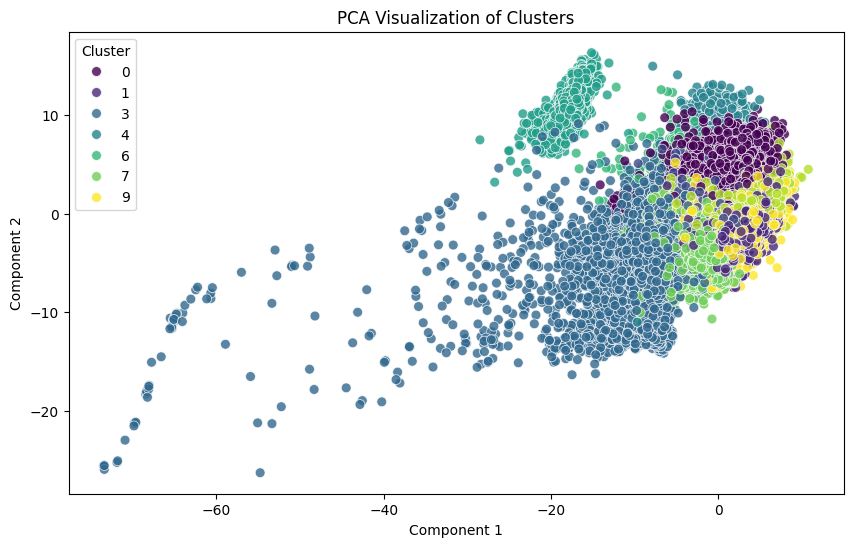

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load Data (Skipping First Column)
train_df = pd.read_csv("train.csv", index_col=0)
label_df = pd.read_csv("labels.csv", index_col=0)  # Optional if labels are used

# Step 2: Preprocessing (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)  # Standardize numerical features

# Step 3: Grid Search Parameters
pca_components = [10,20]
cluster_values = [10, 15, 20, 25, 30]

best_score = -1
best_params = {}
best_labels = None
best_X_reduced = None

# Step 4: Grid Search Loop
for n_components in pca_components:
    # Reduce dimensions with PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_scaled)
    
    for n_clusters in cluster_values:
        # Run MiniBatchKMeans clustering
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
        labels = kmeans.fit_predict(X_reduced)
        
        # Ensure more than one cluster to compute silhouette score
        if len(set(labels)) > 1:
            score = silhouette_score(X_reduced, labels)
            print(f"PCA components: {n_components}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")
            
            if score > best_score:
                best_score = score
                best_params = {"n_components": n_components, "n_clusters": n_clusters}
                best_labels = labels
                best_X_reduced = X_reduced

print("\nBest Silhouette Score:", best_score)
print("Best Parameters:", best_params)

# Step 5: Visualization
def visualize_clusters(X, labels, method="PCA"):
    if method == "PCA":
        reducer = PCA(n_components=2)
        title = "PCA Visualization of Clusters"
    else:
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
        title = "t-SNE Visualization of Clusters"
    
    # Further reduce the best features to 2 components for visualization
    X_vis = reducer.fit_transform(X)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels, palette="viridis", s=50, alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()

# Run visualization on the best result
visualize_clusters(best_X_reduced, best_labels, method="PCA")